In [106]:
from sklearn.ensemble import RandomForestRegressor

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt

import os.path
import datetime
#训练文件夹
TrainFolder='H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed'
TestFolder='H:\\12_Kaggle\\toollife\\pythonProject\\FinalPreProcessed'
ResultFolder='H:\\12_Kaggle\\toollife\\pythonProject\\Result'

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()
# Import a sample binary outcome train/test set into H2O
# train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
# test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")


In [21]:
train

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
1,0.869293,-0.635082,0.22569,0.32747,-0.689993,0.754202,-0.248573,-1.09206,0,1.37499,-0.653674,0.930349,1.10744,1.1389,-1.5782,-1.04699,0,0.65793,-0.0104546,-0.0457672,3.10196,1.35376,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.49797,-0.31301,1.09553,-0.557525,-1.58823,2.17308,0.812581,-0.213642,1.27101,2.21487,0.499994,-1.26143,0.732156,0,0.398701,-1.13893,-0.00081911,0,0.30222,0.833048,0.9857,0.978098,0.779732,0.992356,0.798343
1,0.798835,1.47064,-1.63597,0.453773,0.425629,1.10487,1.28232,1.38166,0,0.851737,1.54066,-0.81969,2.21487,0.99349,0.35608,-0.208778,2.54822,1.25695,1.12885,0.900461,0,0.909753,1.10833,0.985692,0.951331,0.803252,0.865924,0.780118
0,1.34438,-0.876626,0.935913,1.99205,0.882454,1.78607,-1.64678,-0.942383,0,2.42326,-0.676016,0.736159,2.21487,1.29872,-1.43074,-0.364658,0,0.745313,-0.678379,-1.36036,0,0.946652,1.0287,0.998656,0.728281,0.8692,1.02674,0.957904
1,1.10501,0.321356,1.5224,0.882808,-1.20535,0.681466,-1.07046,-0.921871,0,0.800872,1.02097,0.971407,2.21487,0.596761,-0.350273,0.631194,0,0.479999,-0.373566,0.113041,0,0.755856,1.36106,0.98661,0.838085,1.1333,0.872245,0.808487
0,1.59584,-0.607811,0.00707492,1.81845,-0.111906,0.84755,-0.566437,1.58124,2.17308,0.755421,0.64311,1.42637,0,0.921661,-1.19043,-1.61559,0,0.651114,-0.654227,-1.27434,3.10196,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
1,0.409391,-1.88468,-1.02729,1.67245,-1.6046,1.33801,0.0554274,0.0134659,2.17308,0.509783,-1.03834,0.707862,0,0.746918,-0.358465,-1.64665,0,0.367058,0.0694965,1.37713,3.10196,0.869418,1.22208,1.00063,0.545045,0.698653,0.977314,0.828786
1,0.933895,0.62913,0.527535,0.238033,-0.966569,0.547811,-0.0594392,-1.70687,2.17308,0.941003,-2.65373,-0.15722,0,1.03037,-0.175505,0.523021,2.54822,1.37355,1.29125,-1.46745,0,0.901837,1.08367,0.979696,0.7833,0.849195,0.894356,0.774879
1,1.40514,0.536603,0.689554,1.17957,-0.110061,3.2024,-1.52696,-1.57603,0,2.93154,0.567342,-0.130033,2.21487,1.78712,0.899499,0.585151,2.54822,0.401865,-0.151202,1.16349,0,1.66707,4.03927,1.17583,1.04535,1.54297,3.53483,2.74075
1,1.17657,0.104161,1.397,0.479721,0.265513,1.13556,1.53483,-0.253291,0,1.02725,0.534316,1.18002,0,2.40566,0.0875568,-0.976534,2.54822,1.25038,0.268541,0.530334,0,0.833175,0.773968,0.98575,1.1037,0.84914,0.937104,0.812364


In [3]:
test

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
0,0.623878,0.459659,-0.316512,1.55701,0.644784,0.455929,-2.24983,-0.361949,0,0.832978,1.41147,1.52846,0,0.722857,1.00964,0.999539,0,1.19099,0.81404,-0.879803,3.10196,0.583344,0.790246,1.04087,0.848858,0.229702,0.65594,0.677857
0,1.68204,0.774251,1.32875,0.234729,-0.55783,0.442921,-0.0832048,1.08119,2.17308,1.14585,0.16228,-0.268187,0,1.21407,0.194966,-1.15627,2.54822,1.01915,-0.759163,0.136347,0,0.94183,0.941976,0.98816,0.86435,0.835132,0.767871,0.833013
1,1.09403,-0.88734,0.949229,0.410261,-1.55868,0.523352,0.131675,0.304513,0,1.11916,1.09383,-0.396352,2.21487,0.6289,0.628245,1.45775,0,0.523082,0.508394,0.988137,0,0.929989,0.973742,0.989141,0.780519,0.749821,0.887545,0.925278
0,1.33871,-0.899027,-1.25534,0.884285,-0.747925,0.547445,-0.79518,0.174235,2.17308,0.771663,-0.31855,1.02356,2.21487,0.408495,-1.1431,0.139699,0,1.29395,-1.34131,1.61685,0,0.79204,0.76921,0.984082,1.06928,0.700852,0.83083,0.71671
0,0.699095,1.43363,-1.72253,0.650113,-0.167574,0.967464,0.737696,-0.886391,2.17308,1.66797,0.446892,0.851008,0,0.59641,0.156736,0.340513,0,0.694684,-0.00046069,-1.14949,3.10196,0.714182,0.839843,0.984067,0.917766,0.388553,0.91664,0.886331
1,0.842208,-0.144202,-1.702,0.685875,0.544338,0.578774,-0.221837,-0.586474,1.08654,0.909401,2.81316,-0.0706666,0,1.54986,-0.85182,1.58811,0,1.14986,0.590011,0.0597691,0,0.872279,0.684341,0.99032,0.510151,0.720446,0.555454,0.535795
1,0.456242,1.74043,0.258427,1.45223,-0.0513728,0.675328,-0.797161,-1.34763,2.17308,0.56858,-0.482712,-1.73738,0,0.539333,1.17621,1.06666,0,0.980687,-0.125384,0.0869597,3.10196,0.994118,0.960552,1.00353,0.57609,0.876509,0.85138,0.801164
0,0.933712,1.35084,0.773338,0.532638,-0.679537,0.718017,0.745618,-1.4962,1.08654,0.274218,1.07537,1.56341,0,0.39146,-0.59422,0.170209,2.54822,0.573711,2.12157,0.256763,0,0.625972,0.773067,0.987348,0.674946,0.829309,0.645423,0.597715
0,0.7335,-0.998372,-1.68702,0.951169,-0.591779,1.14912,-0.942724,-0.424039,2.17308,1.04185,1.10063,1.27434,0,0.713549,0.0201984,0.343287,2.54822,1.44706,0.165271,1.40599,0,0.798081,0.852638,0.990337,0.799596,0.918739,1.27283,1.07795
0,0.968118,1.719,0.030934,1.80122,-0.867323,0.631357,-0.810034,1.20648,0,0.88699,0.00103165,1.57395,0,1.02721,0.512643,0.381009,2.54822,1.08511,0.54837,-0.86704,3.10196,0.844315,1.03113,1.32327,1.11639,0.728902,0.805447,1.19234


In [115]:
#用后边构建的dfdata来使用h2o

trainfile='All_1min_feature_noOutliers_h2otrain.csv'
trainfile='All_1min_Feature_noOutliers_h2otest.csv'
# testfinal='All_feature_1min_Final.csv'
# all='1s_no_outliers.csv'
# all='1s_featureset1.csv'
trainpath=os.path.join(TrainFolder,trainfile)
testpath=os.path.join(TrainFolder,testfile)


# test_final='All_feature_1min_test_noout.csv'
test_final=os.path.join(TestFolder,testfinal)
# df=pd.read_csv(filepath)


In [117]:
test_final=h2o.import_file(test_final)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [118]:
train = h2o.import_file(trainpath)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [119]:
train

C1,m,csv,duration,c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,sl_max,x_disp_max,x_disp_mean,x_disp_sum,y_disp_max,y_disp_mean,y_disp_sum,z_disp_max,z_disp_mean,z_disp_sum,x_move_count,y_move_count,z_move_count,all_displacement,c1,v1_mean,v1_std,v1_min,v1_25,v1_50,v1_75,v1_max,c2,v2_mean,v2_std,v2_min,v2_25,v2_50,v2_75,v2_max,c3,v3_mean,v3_std,v3_min,v3_25,v3_50,v3_75,v3_max,c4,cu_mean,cu_std,cu_min,cu_25,cu_50,cu_75,cu_max,v1_rms,v1_Xp,v1_Ip,v1_Cf,v1_Ce,v1_Cw,v1_Cq,v2_rms,v2_Xp,v2_Ip,v2_Cf,v2_Ce,v2_Cw,v2_Cq,v3_rms,v3_Xp,v3_Ip,v3_Cf,v3_Ce,v3_Cw,v3_Cq,life
2,0,3,-59.85,2338,13.7017,3.46045,4.59304,11.0813,13.3946,15.9948,24.5735,44.6666,17.4899,4005.18,40.8135,15.3264,3571.06,0,nan,0,229,233,0,6621.08,1.5488e+06,0.0308494,1.90469,-14.1715,-1.11184,0.0222368,1.16254,15.5409,1.5488e+06,-0.0125174,1.64946,-15.0323,-0.955359,-0.00109255,0.942563,15.5232,1.5488e+06,0.0130609,1.99276,-13.8259,-1.24545,0.0130347,1.27091,15.9337,1.5488e+06,-0.330611,35.6529,-59.122,-35.9631,-0.410578,35.2457,58.7834,3.6288,13.4416,7.05619,435.718,61.7498,1.76e-08,2.99e-06,2.72087,14.4652,8.14889,-1073.84,-152.184,-2.61e-08,3.62e-06,3.97126,13.9669,6.74509,1029.15,145.851,4.96e-09,2.44e-06,230
3,0,4,-59.88,2275,13.3551,3.25381,4.51064,11.1057,13.1718,15.2867,25.3822,57.3324,16.8798,3899.23,43.3329,16.7045,3942.26,0,nan,0,231,236,0,6768.62,1.5488e+06,0.0290163,1.87294,-17.1947,-1.10794,0.0182109,1.14814,15.9478,1.5488e+06,-0.0138546,1.65314,-15.61,-0.957799,-0.00158041,0.943417,14.7237,1.5488e+06,0.0118024,6.55365,-59.0375,-1.45593,-0.0623374,1.29876,65.57,1.5488e+06,-0.322389,35.505,-58.9292,-35.7897,-0.405827,35.0982,58.3721,3.50875,14.0169,7.48301,483.071,64.5557,3.59e-08,2.96e-06,2.73305,13.9878,8.47869,-1011.71,-135.201,-2.78e-08,3.61e-06,42.9504,63.2756,2.13879,1187.63,158.71,1.29e-06,2.12e-05,225
4,0,5,-59.941,2302,13.851,3.59831,4.23902,11.5787,13.8829,15.8147,25.6935,44.6667,14.8932,3514.81,42.0042,18.1058,4327.29,0,nan,0,236,239,0,6808.62,1.536e+06,0.0304904,1.92809,-16.9095,-1.12453,0.0229688,1.1734,14.6778,1.536e+06,-0.0121814,1.71535,-16.0928,-0.974173,-0.000238779,0.965981,16.2621,1.536e+06,0.0121064,9.05006,-62.5011,-1.62072,-0.0436471,1.48395,69.2892,1.536e+06,-0.316911,35.3594,-58.9915,-35.6458,-0.398568,34.9708,58.2057,3.71844,13.8885,7.20238,455.506,63.2437,1.16e-08,3.05e-06,2.94258,14.5635,8.09641,-1140.15,-158.301,-3.08e-08,3.74e-06,81.9037,66.5229,1.53463,1147.2,159.281,4.72e-07,1.13e-05,220
5,0,6,-59.228,2267,13.7816,4.40364,3.89111,11.1698,13.7638,16.4251,26.8624,62.7828,13.1672,3081.12,49.3333,18.4669,4395.13,2.3252,0.373286,5.226,234,238,14,6551.94,1.5488e+06,0.0286599,2.00531,-16.9193,-1.17687,0.0195529,1.21939,13.9087,1.5488e+06,-0.0117218,1.78634,-17.8551,-1.01451,0.00293235,1.00794,18.0573,1.5488e+06,0.00980457,7.58102,-43.9366,-1.74544,-0.194025,1.23939,69.4351,1.5488e+06,-0.336673,35.2785,-58.8479,-35.5719,-0.420864,34.8677,57.712,4.02208,13.5829,6.7728,473.936,69.9763,3.08e-08,2.96e-06,3.19114,15.4012,7.60363,-1158.77,-171.092,-3.72e-08,3.67e-06,57.472,67.4494,1.7917,1385.37,204.549,2.1e-06,1.74e-05,215
6,0,7,-59.108,2320,14.0414,4.72764,3.90942,10.5899,14.1606,17.0843,26.6701,55.9447,12.4898,2935.1,47.982,18.3425,4292.14,2.3384,0.373286,5.226,235,234,14,6378.53,1.5488e+06,0.0302007,2.00297,-19.1004,-1.17797,0.0208949,1.225,14.6948,1.5488e+06,-0.0103379,1.77708,-15.4163,-1.00927,0.00890872,1.01074,16.3196,1.5488e+06,0.0115846,2.79607,-13.5302,-1.34721,-0.0273999,1.27628,62.8597,1.5488e+06,-0.335277,35.1727,-58.2836,-35.4689,-0.407568,34.7592,57.7315,4.01281,13.9091,6.94342,460.554,66.3295,1.61e-08,2.9e-06,3.15813,14.6738,7.82678,-1345.45,-193.773,-5.55e-08,3.6e-06,7.81812,61.9381,4.97447,1200.66,172.92,5.2e-06,0.000102464,210
7,0,8,-59.89,2277,14.1855,4.65562,3.83312,10.8524,14.0568,17.5298,26.7434,46,14.2936,3216.07,65.4716,17.4368,3975.59,2.3206,0.373286,5.226,225,228,14,6411.8,1.5488e+06,0.0285302,2.02132,-15.1435,-1.19187,0.015649,1.22903,14.9776,1.5488e+06,-0.0122741,1.71571,-13.4253,-0.995486,0.00585955,0.991

In [120]:
features_all_list=['spindle_load_mean',
       'sl_std','sl_max',
        'v1_mean', 'v1_max', 
       'v2_mean','v2_max', 'v3_mean', 'v3_max', 'cu_mean', 'cu_std', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']

feature_and_life_h2o=['C1']+features_all_list+['life']

In [121]:
train=train[feature_and_life_h2o]
test=test[feature_and_life_h2o]
test_final=test_final[feature_and_life_h2o]

In [124]:
x=train.columns
y='life'
x.remove(y)

In [125]:
#h20例子
# Identify predictors and response
# x = train.columns
# y = "response"
# x.remove(y)

# For binary classification, response should be a factor
# train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# Run AutoML for 30 seconds
aml = H2OAutoML(max_runtime_secs = 360)
aml.train(x = x, y = y,
          training_frame = train,
          leaderboard_frame = test)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)


AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_20181227_195950_model_15,0.0280005,0.167333,0.0280005,0.0268129,0.00158645
GBM_grid_1_AutoML_20181227_200620_model_5,0.117224,0.34238,0.117224,0.274802,0.010061
GBM_grid_1_AutoML_20181227_195950_model_91,0.168831,0.41089,0.168831,0.328618,0.0151232
GBM_grid_1_AutoML_20181227_200620_model_22,0.353141,0.594257,0.353141,0.0951682,0.00551029
GBM_1_AutoML_20181227_195950,0.540103,0.734917,0.540103,0.413321,0.0130191
GBM_grid_1_AutoML_20181227_200620_model_80,1.01278,1.00637,1.01278,0.161415,0.00978714
GBM_grid_1_AutoML_20181227_200620_model_34,1.3218,1.14969,1.3218,0.565305,0.017526
GBM_grid_1_AutoML_20181227_195950_model_61,1.34175,1.15834,1.34175,0.187117,0.010571
GBM_grid_1_AutoML_20181227_200620_model_21,1.55558,1.24723,1.55558,0.549088,0.0244799
GBM_grid_1_AutoML_20181227_195950_model_87,1.63378,1.27819,1.63378,0.65439,0.0192424


In [69]:
aml.leader

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_grid_1_AutoML_20181223_171351_model_1


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 530.8891880677057
RMSE: 23.04103270401971
MAE: 19.65533717155317
RMSLE: 0.33718527986225405
R^2: 0.8608608613597475
Mean Residual Deviance: 530.8891880677057
Null degrees of freedom: 63
Residual degrees of freedom: 29
Null deviance: 244193.75
Residual deviance: 33976.90803633317
AIC: 655.1955443521223

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 537.8490458107519
RMSE: 23.191572732584394
MAE: 21.219062177956115
RMSLE: 0.5188348944486582
R^2: 0.8304332085901485
Mean Residual Deviance: 537.8490458107519
Null degrees of freedom: 10
Residual degrees of freedom: -24
Null deviance: 35235.44921875
Residual deviance: 5916.3395039182715
AIC: 172.3800050352571

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 809.0360040795664
RMSE: 28.443558217

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,22.735682,2.819723,24.132442,15.473689,26.15608,21.707195,26.209005
mean_residual_deviance,718.89923,149.71632,736.2626,371.73734,955.6423,618.8834,911.97046
mse,718.89923,149.71632,736.2626,371.73734,955.6423,618.8834,911.97046
null_deviance,48900.855,4217.801,54665.61,54972.242,49260.824,46883.37,38722.227
r2,0.8054933,0.0484089,0.8243157,0.9117646,0.7463030,0.8278191,0.7172641
residual_deviance,9163.296,1843.0603,9571.414,4832.5854,12423.35,8045.4844,10943.6455000
rmse,26.480865,2.971779,27.13416,19.28049,30.913465,24.877367,30.198849
rmsle,0.3725067,0.0552785,NaN,0.3243189,0.4627056,0.3304956,NaN


Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-12-23 17:13:54,0.000 sec,1,.47E4,35,3807.6753501,3194.5075769,3804.7878386,188.9061773
,2018-12-23 17:13:54,0.000 sec,2,.34E4,35,3804.7551683,3191.2702896,3802.3849550,188.9291186
,2018-12-23 17:13:54,0.001 sec,3,.25E4,35,3800.7494157,3186.8333868,3799.0860800,188.9607472
,2018-12-23 17:13:54,0.001 sec,4,.18E4,35,3795.2694078,3180.7696719,3794.5692331,189.0041859
,2018-12-23 17:13:54,0.001 sec,5,.13E4,35,3787.7748789,3172.4908624,3788.3932072,189.0640283
---,---,---,---,---,---,---,---,---,---
,2018-12-23 17:13:54,0.008 sec,26,.17E1,35,900.0043202,891.6358921,1215.2607930,97.4630916
,2018-12-23 17:13:54,0.008 sec,27,.12E1,35,751.9290284,760.6330933,1060.5006899,109.0688924
,2018-12-23 17:13:54,0.008 sec,28,.89E0,35,629.8098739,641.2689677,926.1610019,113.2552723
,2018-12-23 17:13:54,0.009 sec,29,.65E0,35,530.8891881,537.8490458,812.3684871,111.2383423



See the whole table with table.as_data_frame()


In [128]:
#用automl的结果预测，全部预测，或者只用leader
# preds = aml.predict(test_final)

# or:
preds = aml.leader.predict(test_final)

H2OResponseError: Server error water.exceptions.H2OKeyNotFoundArgumentException:
  Error: Object 'py_28_sid_8850' not found in function: predict for argument: frame
  Request: POST /4/Predictions/models/GBM_grid_1_AutoML_20181227_195950_model_15/frames/py_28_sid_8850


In [105]:
h2o.download_csv(preds,'H:\\12_Kaggle\\toollife\\pythonProject\\Result\\h2o.csv')

In [ ]:
#写一个判断分数
def sc():
    

In [69]:
%matplotlib inline  
#设置图像大小
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize
figsize(3,3) # 设置 figsize   不用这个也可以通过调整像素调整大小
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率

In [11]:
all="All_1min_Additional_Orig_PlusLife_122row.csv"
all='All_1min_Additional_Orig_PlusLife_109row_lean.csv'
all='All_1min_Additional_Orig_PlusFeatures.csv'
all='All_1min_Additional_Orig_PlusFeatures_OutliersRemoved.csv'
all='All_1min_feature_noOutliers.csv'
# all='1s_no_outliers.csv'
# all='1s_featureset1.csv'
filepath=os.path.join(TrainFolder,all)
df=pd.read_csv(filepath)

In [12]:
testname='All_feature_1min_test_noout.csv'
testfile=os.path.join(TestFolder,testname)
df_test=pd.read_csv(testfile)

In [10]:
df_test[[features_final]]

NameError: name 'features_final' is not defined

In [251]:
df.columns

Index(['Unnamed: 0', 'm', 'csv', 'duration', 'c', 'spindle_load_mean',
       'sl_std', 'sl_min', 'sl_25', 'sl_50', 'sl_75', 'sl_max', 'x_disp_max',
       'x_disp_mean', 'x_disp_sum', 'y_disp_max', 'y_disp_mean', 'y_disp_sum',
       'z_disp_max', 'z_disp_mean', 'z_disp_sum', 'x_move_count',
       'y_move_count', 'z_move_count', 'all_displacement', 'c1', 'v1_mean',
       'v1_std', 'v1_min', 'v1_25', 'v1_50', 'v1_75', 'v1_max', 'c2',
       'v2_mean', 'v2_std', 'v2_min', 'v2_25', 'v1_50.1', 'v2_75', 'v2_max',
       'c3', 'v3_mean', 'v3_std', 'v3_min', 'v3_25', 'v3_50', 'v3_75',
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_25', 'cu_50',
       'cu_75', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq',
       'life'],
      dtype='object')

In [ ]:
#需要检查每一个m和csv，在x,y,z方向运动


In [13]:
features_all_list=['spindle_load_mean',
       'sl_std', 'sl_min', 'sl_25', 'sl_50', 'sl_75', 'sl_max','v1_mean',
       'v1_std', 'v1_min', 'v1_25', 'v1_50', 'v1_75', 'v1_max', 'c2',
       'v2_mean', 'v2_std', 'v2_min', 'v2_25', 'v1_50.1', 'v2_75', 'v2_max',
       'c3', 'v3_mean', 'v3_std', 'v3_min', 'v3_25', 'v3_50', 'v3_75',
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_25', 'cu_50',
       'cu_75', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']
#1. 用这一系列feature，最好的效果是按照从大到小corr取8个feature，也就是
#['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'v2_25', 'v2_75', 'sl_75', 'v1_50',

#2. 尝试减少一些重复的feature，比如所有的25和75
features_all_list=['spindle_load_mean',
       'sl_std', 'sl_max','v1_mean',
       'v1_std', 'v1_min',  'v1_50', 'v1_max', 
       'v2_mean', 'v2_std', 'v2_min', 'v1_50.1', 'v2_max', 'v3_mean', 'v3_std', 'v3_min' , 'v3_50',
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_50', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']

#在这个系列，展现了很高的泛华能力，用14个feature也能达到在其他数据集上都有0.6-0.7左右的分数 如下是14个
#['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'v1_50', 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_std', 'v1_Xp', 'v3_Cq', 'v1_min', 'v1_mean',

#3. 再次尝试减少一些重复的feature，比如不要sl，只留下mean，std,min,max,不行，

#4 尝试在2的基础上，不要各类50
features_all_list=['spindle_load_mean',
       'sl_std','sl_max','v1_mean',
       'v1_std', 'v1_min',  'v1_max', 
       'v2_mean', 'v2_std', 'v2_min', 'v2_max', 'v3_mean', 'v3_std', 'v3_min' ,
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']
#结果和2相似，最终最好结果在13个feature，'sl_max', 'sl_std', 'cu_min', 'cu_mean',
# 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_std', 'v1_Xp', 'v3_Cq','v1_min', 'v1_mean', 'cu_std'

#5测试到最终14个feature以后，综合互相之间的线性关系，再去掉几个，去掉cu_min，去掉v1_min，v1_std，
features_all_list=['spindle_load_mean',
       'sl_std','sl_max',
        'v1_mean', 'v1_max', 
       'v2_mean'  'v2_max', 'v3_mean', 'v3_max', 'cu_mean', 'cu_std', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']
#如上，最终效果更好了，在14个feature达到了3个0.65，或者更多的时候，也比较稳定

#6再尝试去掉v2_min, v2_std,v3等，用10个feature就可
#['sl_max', 'sl_std', 'cu_mean', 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_Xp', 'v3_Cq', 'v1_mean',  
#再添加'cu_std', 'cu_std', 'v3_Cw', 'v1_Cf', 'spindle_load_mean', 'v2_Ip',影响结果较小

features_all_list=['spindle_load_mean',
       'sl_std','sl_max',
        'v1_mean', 'v1_max', 
       'v2_mean','v2_max', 'v3_mean', 'v3_max', 'cu_mean', 'cu_std', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']

feature_and_life=features_all_list+['life']

In [14]:
dfdata=df[feature_and_life]

In [260]:
#相互之间corr
dfdata.corr()['life'].abs().sort_values()

v3_max               0.013217
v3_Ce                0.014970
v3_Xp                0.032662
v3_mean              0.036288
v3_Cf                0.062648
v1_Cq                0.073128
v2_mean              0.080422
v2_Cq                0.107467
v3_Ip                0.122265
v2_Cw                0.124360
v3_rms               0.171973
v1_Cw                0.180503
v1_Ce                0.187784
v1_Ip                0.190970
v2_Xp                0.192659
v2_max               0.197813
v2_rms               0.218222
v2_Ce                0.245425
v2_Ip                0.248796
spindle_load_mean    0.257183
v1_Cf                0.264714
v3_Cw                0.272256
cu_std               0.278427
v1_mean              0.299995
v3_Cq                0.314004
v1_Xp                0.319245
v1_rms               0.338116
v1_max               0.341723
v2_Cf                0.343348
cu_max               0.370702
cu_mean              0.430217
sl_std               0.581583
sl_max               0.789738
life      

In [261]:
flist_by_corr=list(dfdata.corr()['life'].abs().sort_values().index)

In [262]:
flist_by_corr.reverse()

In [263]:
flist_by_corr=flist_by_corr[1:]

In [264]:
flist_by_corr

['sl_max',
 'sl_std',
 'cu_mean',
 'cu_max',
 'v2_Cf',
 'v1_max',
 'v1_rms',
 'v1_Xp',
 'v3_Cq',
 'v1_mean',
 'cu_std',
 'v3_Cw',
 'v1_Cf',
 'spindle_load_mean',
 'v2_Ip',
 'v2_Ce',
 'v2_rms',
 'v2_max',
 'v2_Xp',
 'v1_Ip',
 'v1_Ce',
 'v1_Cw',
 'v3_rms',
 'v2_Cw',
 'v3_Ip',
 'v2_Cq',
 'v2_mean',
 'v1_Cq',
 'v3_Cf',
 'v3_mean',
 'v3_Xp',
 'v3_Ce',
 'v3_max']

In [54]:
testfile="Test_All_1min_Additional_All.csv"
testfilepath=os.path.join(TestFolder,testfile)
df_test=pd.read_csv(testfilepath)

In [55]:
#看没有x，没有y运动的时间
df[df['x_disp_sum']==0].count()[0],df[df['y_disp_sum']==0].count()[0],df[df['z_disp_sum']==0].count()[0],

KeyError: 'x_disp_sum'

In [267]:
#1min，写 一个函数用来产生不同的feature组合,需要flist_by_corr
result_list_self=[]
result_3m=[]
for i in range(2,20): #最少feature数量以及最多feature数量
    flist_train=flist_by_corr[:i]
    df_f=df[flist_train]
    x=np.array(df_f)
    y=np.array(df['life'])

    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)
    
    
    # 随机森林
    model= RandomForestRegressor(n_estimators=100) 
    # Train the model using the training sets and check score 
    model.fit(X_train, y_train) 

    result_list_self.append([len(flist_train),flist_train,model.score(X_train,y_train),model.score(X_test,y_test)])
    print('training with', len(flist_train),model.score(X_train,y_train),model.score(X_test,y_test))
    
    #需要测试泛化能力
    df0=df[df['m']==0]
    df1=df[df['m']==1]
    df2=df[df['m']==2]
    indexlist=[0,1,2]
    dflist=[df0,df1,df2]

    for n in range(3): #3个循环
        index=indexlist[n]
        print(index)
        l_copy=indexlist.copy()
        l_copy.remove(index)
        print(l_copy)

        df_test=dflist[index]
        need_to_concat=dflist[l_copy[0]]
        df_train=pd.concat([dflist[l_copy[0]],dflist[l_copy[1]]])

        X_train=np.array(df_train[flist_train])

        y_train=np.array(df_train['life'])

        X_test=np.array(df_test[flist_train])
        y_test=np.array(df_test['life'])

        # 随机森林
        modelRF= RandomForestRegressor(n_estimators=1000) 
        # Train the model using the training sets and check score 
        modelRF.fit(X_train, y_train) 
        print('随机森林',modelRF.score(X_train,y_train),modelRF.score(X_test,y_test))  #两种计算r2是一样的
        result_3m.append([n,flist_train,modelRF.score(X_train,y_train),modelRF.score(X_test,y_test)])
        

training with 2 0.9365099123518343 0.7271483669703386
0
[1, 2]
随机森林 0.95070515488831 0.5904427521429063
1
[0, 2]
随机森林 0.9627289671962544 0.44253863778081476
2
[0, 1]
随机森林 0.9548543798648835 0.1490284304594085
training with 3 0.9693985686142692 0.8054709460204791
0
[1, 2]
随机森林 0.9778135170721428 0.6022455160600577
1
[0, 2]
随机森林 0.9733990404898488 0.5787911121230886
2
[0, 1]
随机森林 0.9770040162139887 0.4835603087645473
training with 4 0.9697634997595724 0.8492685531880391
0
[1, 2]
随机森林 0.9781897908611733 0.676770042066081
1
[0, 2]
随机森林 0.9750711108936976 0.6673861758349706
2
[0, 1]
随机森林 0.9771173290409054 0.4996684239970695
training with 5 0.9713388934831413 0.7937805211433466
0
[1, 2]
随机森林 0.9777972290457473 0.684634081045375
1
[0, 2]
随机森林 0.9793267181280841 0.6152078376719057
2
[0, 1]
随机森林 0.9780408671436955 0.4957009953880691
training with 6 0.9699693420601674 0.841775753961154
0
[1, 2]
随机森林 0.9762919560552281 0.6691665957999662
1
[0, 2]
随机森林 0.9792882862387489 0.6156753202037242
2
[0, 

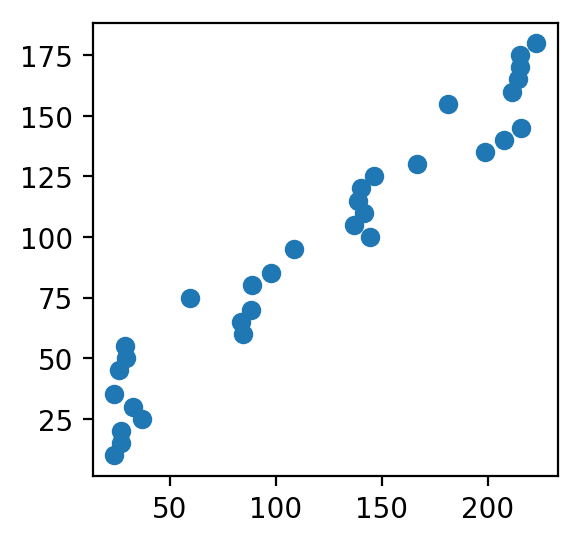

In [268]:
plt.scatter(modelRF.predict(X_test),y_test)

In [160]:
result_list_self

[[2, ['sl_max', 'sl_std'], 0.94610522502214, 0.7169058452393368],
 [3, ['sl_max', 'sl_std', 'cu_min'], 0.9618343903999135, 0.6722583573304644],
 [4,
  ['sl_max', 'sl_std', 'cu_min', 'cu_mean'],
  0.9718737539815514,
  0.6922280209563868],
 [5,
  ['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'cu_max'],
  0.9739138745978526,
  0.7831491960655939],
 [6,
  ['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'cu_max', 'v2_Cf'],
  0.9641243173629365,
  0.8796546141794128],
 [7,
  ['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'cu_max', 'v2_Cf', 'v1_max'],
  0.9628207780698097,
  0.8480644472045298],
 [8,
  ['sl_max',
   'sl_std',
   'cu_min',
   'cu_mean',
   'cu_max',
   'v2_Cf',
   'v1_max',
   'v1_rms'],
  0.9688782709573706,
  0.7779779666534052],
 [9,
  ['sl_max',
   'sl_std',
   'cu_min',
   'cu_mean',
   'cu_max',
   'v2_Cf',
   'v1_max',
   'v1_rms',
   'v1_std'],
  0.965932612568181,
  0.8939273601971622],
 [10,
  ['sl_max',
   'sl_std',
   'cu_min',
   'cu_mean',
   'cu_max',
   'v2_Cf',
   'v1_max',

In [134]:
df['life']

0      230.0
1      225.0
2      220.0
3      215.0
4      210.0
5      205.0
6      200.0
7      195.0
8      190.0
9      185.0
10     175.0
11     170.0
12     165.0
13     160.0
14     155.0
15     150.0
16     145.0
17     140.0
18     135.0
19     130.0
20     125.0
21     120.0
22     115.0
23     110.0
24     105.0
25      95.0
26      90.0
27      85.0
28      80.0
29      75.0
       ...  
84     170.0
85     165.0
86     160.0
87     155.0
88     145.0
89     140.0
90     135.0
91     130.0
92     125.0
93     120.0
94     115.0
95     110.0
96     105.0
97     100.0
98      95.0
99      85.0
100     80.0
101     75.0
102     70.0
103     65.0
104     60.0
105     55.0
106     50.0
107     45.0
108     35.0
109     30.0
110     25.0
111     20.0
112     15.0
113     10.0
Name: life, dtype: float64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [265]:
#尝试用1，2训练，3测试，或者其他的组合
# df0=df[df['Machine']==0]
# df1=df[df['Machine']==1]
# df2=df[df['Machine']==2]
df0=df[df['m']==0]
df1=df[df['m']==1]
df2=df[df['m']==2]
indexlist=[0,1,2]
dflist=[df0,df1,df2]

for n in range(3): #3个循环
    index=indexlist[n]
    print(index)
    l_copy=indexlist.copy()
    l_copy.remove(index)
    print(l_copy)
    
    df_test=dflist[index]
    need_to_concat=dflist[l_copy[0]]
    df_train=pd.concat([dflist[l_copy[0]],dflist[l_copy[1]]])

    X_train=np.array(df_train[x_features_1s])

    y_train=np.array(df_train['life'])

    X_test=np.array(df_test[x_features_1s])
    y_test=np.array(df_test['life'])

    # 随机森林
    modelRF= RandomForestRegressor(n_estimators=100) 
    # Train the model using the training sets and check score 
    modelRF.fit(X_train, y_train) 

    predicted=modelRF.predict(X_train)
    print('随机森林',modelRF.score(X_train,y_train),r2_score(y_train,predicted),modelRF.score(X_test,y_test))  #两种计算r2是一样的
    
    #多元线性回归
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    print('线性回归：',lr.score(X_train,y_train),lr.score(X_test,y_test))

0
[1, 2]
随机森林 0.9506948139938759 0.9506948139938759 0.2807731255439445
线性回归： 0.8934120381036034 0.5496129971636003
1
[0, 2]
随机森林 0.9716713606145063 0.9716713606145064 -0.0851683928418896
线性回归： 0.9289924372361811 -0.5385779783455789
2
[0, 1]
随机森林 0.9655562795073199 0.9655562795073198 -1.2442411880183721
线性回归： 0.8972163751059764 0.2306355369030206


# 最终feature 


In [233]:
feature_final=['sl_max', 'sl_std', 'cu_min', 
               'cu_mean', 'v1_50', 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_std', 'v1_Xp', 'v3_Cq', 'v1_min', 'v1_mean']

In [ ]:
feature_final=['sl_max', 'sl_std', 'cu_mean', 'v1_50', 'cu_max', 'v2_Cf', 'v1_rms', 'v1_Xp', 'v3_Cq', 'v1_min', 'v1_mean']

In [281]:
#1218
feature_final=['sl_max', 'sl_std', 'cu_mean', 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_Xp', 'v3_Cq', 'v1_mean']

In [234]:
#探索final之间的相关性，太高的可以考虑去除避免过拟合,
# cu_min和cu_max，去掉cu_min，
#v2_cf和v1_max，先不去除
#v1_max和v1_min，v1_rms，v1 std都高度相似，保留去掉v1_max，去掉v1_std
dq=df[feature_final]
dq.corr()

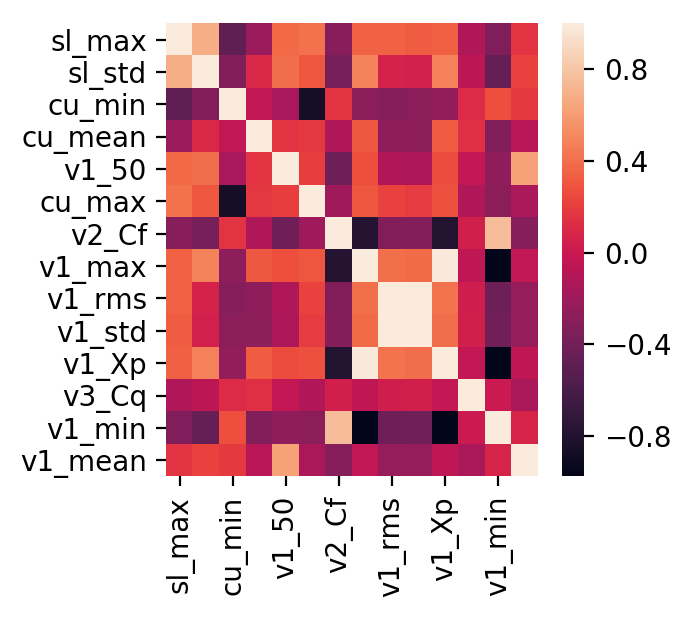

In [239]:
sns.heatmap(dq.corr())

In [270]:
#用所有数据进行训练
X_train=np.array(df[feature_final])
y_train=np.array(df['life'])

In [278]:
#trick去掉最早的30分钟
X_train=np.array(df[feature_final].loc[6:])
y_train=np.array(df['life'].loc[6:])

In [285]:
# 随机森林
model= RandomForestRegressor(n_estimators=100) 
# Train the model using the training sets and check score 
model.fit(X_train, y_train) 

predicted=model.predict(X_train)
model.score(X_train,y_train)

0.977635483492418

In [289]:
test_final=df_test[feature_final]
test_final

,sl_max,sl_std,cu_mean,cu_max,v2_Cf,v1_max,v1_rms,v1_Xp,v3_Cq,v1_mean
0,0.198370,0.039111,50.300987,51.345484,-192.911456,0.290263,0.004071,0.275502,0.000002,0.036900
1,28.177740,5.881278,-0.300844,58.267598,-2871.552144,16.036121,2.306713,14.196436,0.000002,0.030300
2,26.908170,5.851054,-0.301342,58.585485,-3896.946428,16.416750,2.335993,14.674016,0.000002,0.030044
3,27.213355,5.940913,-0.306905,58.077216,-3211.085984,15.955237,2.336576,13.299737,0.000002,0.031402
4,29.026154,5.384694,-0.316385,58.731681,-4837.819005,21.896837,2.277886,19.259051,0.000002,0.032970
5,33.634449,8.136197,-0.303977,60.222931,-890.190404,11.376704,2.916593,9.600129,0.000002,0.026157
6,23.325297,7.346858,-0.313732,58.798350,-1236.395547,11.034138,2.755184,9.462224,0.000002,0.028960
7,23.398541,3.020703,-0.311604,58.825288,-6077.613495,31.240557,6.420255,29.169006,0.000015,0.031734
8,38.080996,3.279382,-0.399371,66.349465,3425.684621,5.702277,1.078192,5.386501,0.000003,0.040147
9,23.493149,3.047976,-0.328833,57.490300,-1779.898770,13.575083,3.849646,12.721766,0.000002,0.030620


In [207]:
test_final.isnull().any(1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
dtype: bool

In [208]:
test_final2=test_final.drop(14)

In [210]:
test_final2.isnull().any(1)
test_final2.to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\TestPreProcessed\\All_feature_1min_noNull.csv')

In [225]:
#输出结果
dft=pd.read_csv('H:\\12_Kaggle\\toollife\\pythonProject\\TestPreProcessed\\All_feature_1min_test_noout.csv')
X_test=np.array(dft[feature_final])

In [290]:
predicted=model.predict(test_final)
predicted

array([190.2 , 168.65, 195.8 , 183.15,  52.75,  30.45, 173.7 , 191.95,
        29.75, 181.3 , 169.65, 179.6 , 184.35, 174.  , 183.3 , 130.45,
       189.1 , 195.2 , 192.55, 200.25, 197.55, 194.7 , 180.8 , 173.7 ,
       184.9 , 159.3 , 121.55, 112.8 , 102.1 , 109.65,  93.3 , 101.45,
        99.45, 174.05,  69.5 , 135.4 , 113.05, 121.4 , 106.6 , 172.  ,
        45.95, 148.2 ,  45.2 ])

In [292]:
r=pd.DataFrame(predicted)
rr=r.join(dft)

In [293]:
rr.to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\Result\\x1218.csv')

In [331]:
#多元线性回归
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.9024673041957672, 0.8291638410258347)

In [190]:
#神经网络模型
# def r2(y_true,y_pred): #自己定义一个metrics方便,todo
#     return y_true

model=Sequential()
# model.add(Dense(input_dim=14,activation='relu',units=3))
# model.add(Dense(activation='relu',units=24))
# model.add(Dense(activation='relu',units=12))
# model.add(Dense(activation='sigmoid',units=1))


model.add(Dense(input_dim=14,activation='relu',units=16))
model.add(Dense(activation='relu',units=48))
# model.add(Dense(activation='relu',units=128))
model.add(Dense(activation='relu',units=6))
# model.add(Dense(activation='relu',units=12))
model.add(Dense(activation='relu',units=1))


# opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.9, epsilon=1e-08, amsgrad=True)
opt = optimizers.Adam(lr=0.01)

# Compile model
# model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# Fit the model
# model.fit(X_train, y_train, epochs=75, batch_size=100)
model.fit(X_train, y_train,epochs=75,batch_size=16)    #16，128，1，batch=16，得到loss3544

Epoch 1/75
114/114 [==============================] - 0s 4ms/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 2/75
114/114 [==============================] - 0s 87us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 3/75
114/114 [==============================] - 0s 105us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 4/75
114/114 [==============================] - 0s 96us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 5/75
114/114 [==============================] - 0s 70us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 6/75
114/114 [==============================] - 0s 87us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 7/75
114/114 [==============================] - 0s 114us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 8/75
114/114 [==============================] - 0s 87us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 9/75
114/114 [==============================] - 0s 78us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 10/75
114/114 [==============================] - 0s 79us/

In [302]:
predicted=model.predict(X_train)
predicted_test=model.predict(X_test)
r2_score(y_train,predicted),r2_score(y_test,predicted_test)

(0.9756996490379827, 0.8268850284786539)

In [ ]:
history = model.fit(X_train, y_train,
             epochs=10,
             batch_size=32,
             validation_data=(X_test, y_test),
             )

In [336]:
model.score(X_train,y_train)

0.9759341141622716

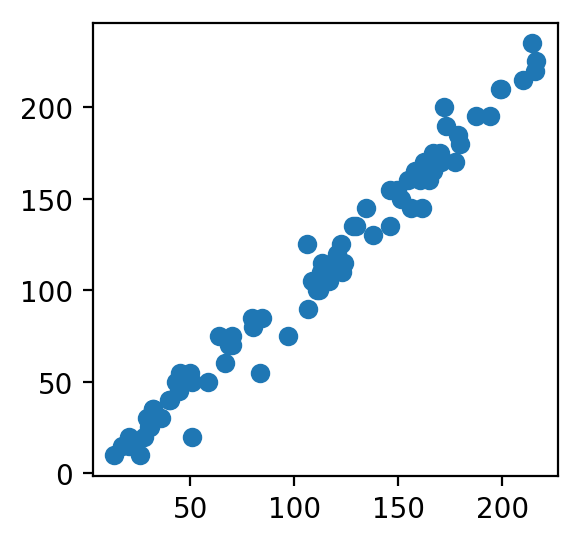

In [303]:
train_predicted=model.predict(X_train)
plt.scatter(train_predicted,y_train)

In [351]:
model.score(X_test,y_test) 

ValueError: Number of features of the model must match the input. Model n_features is 14 and input n_features is 23 

In [338]:
#Predict Output 
predicted= model.predict(X_test) 


array([222.71333333, 212.12166667, 216.67333333, 209.41666667,
       217.20333333, 167.39666667, 213.44833333, 212.805     ,
       202.035     , 170.48      , 163.315     , 141.775     ,
       145.98833333,  99.57166667, 145.00833333, 148.035     ,
       104.905     ,  79.06833333,  71.80666667,  80.32333333,
        80.49166667,  78.63      ,  74.76666667,  36.76833333,
        43.16166667,  30.44333333,  33.68666667,  23.86      ,
        24.74166667,  35.12      ,  36.31      ,  36.48333333])

ValueError: x and y must be the same size

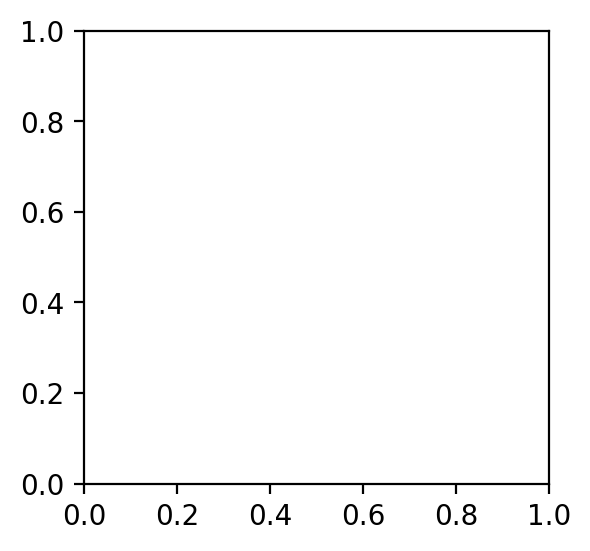

In [350]:
#validation结果
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(predicted,y_test)
ax.set_xlabel('predicted')
ax.set_ylabel('real')
plt.tight_layout
plt.show()

In [361]:
len(x1),len(y)

(117, 117)

In [362]:
#输出值


#首先用所有数据训练，而不是部分数据
# 随机森林
model_final= RandomForestRegressor(n_estimators=1000) 
# Train the model using the training sets and check score 
model_final.fit(x1, y) 

predicted=model_final.predict(X_train)

testfile="Test_All_1min.csv"
testfile="Test_All_1min_Additional_All_OutliersRemoved.csv"
testfilepath=os.path.join(TestFolder,testfile)
df_test=pd.read_csv(testfilepath)

TestX=np.array(df_test[x1_features])

predicted_Test=model_final.predict(TestX)
predicted_Test

array([140.485, 167.065, 162.88 ,  31.4  , 176.365, 192.89 , 178.385,
       163.92 , 161.425, 163.055, 165.5  , 151.425, 171.6  , 134.445,
       177.37 , 188.4  , 175.665, 178.24 , 186.735, 183.095, 181.26 ,
       170.43 , 177.87 , 176.3  , 162.4  , 166.89 , 111.41 ,  96.765,
        98.75 ,  95.88 ,  96.43 , 109.18 , 112.585, 176.5  , 182.045,
        73.015, 138.73 , 114.765, 116.59 , 113.62 , 152.545,  41.12 ,
       133.29 ,  38.085,  48.19 ])

In [363]:
x1_features

['sl_mean',
 'sl_std',
 'sl_max',
 'vibration_1_min',
 'vibration_1_25%',
 'vibration_1_50%',
 'vibration_1_75%',
 'vibration_1_max',
 'vibration_2_min',
 'vibration_2_25%',
 'vibration_2_50%',
 'vibration_2_75%',
 'vibration_2_max',
 'vibration_3_min',
 'vibration_3_25%',
 'vibration_3_50%',
 'vibration_3_75%',
 'vibration_3_max',
 'current_min',
 'current_max',
 'current_50%',
 'current_mean',
 'current_std']

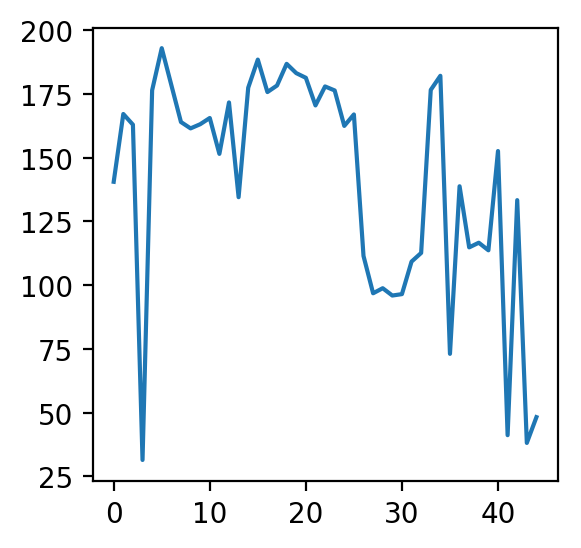

In [365]:
plt.plot(predicted_Test,)

In [378]:
df_result.join(df_test)

,0,Unnamed: 0,Unnamed: 0.1,Machine,csv_no,Duration,sl_mean,sl_std,sl_25,sl_50,...,vibration_3_75%,vibration_3_max,current_count,current_mean,current_std,current_min,current_25%,current_50%,current_75%,current_max
0,140.485,1,2,0,2,59.710,14.836691,5.881278,10.501419,14.859462,...,1.254537,15.588429,1548800,-0.300844,35.279274,-58.402241,-35.527079,-0.387075,34.868307,58.267598
1,167.065,2,3,0,3,59.846,15.368488,5.851054,11.017182,15.500351,...,1.262477,15.755909,1548800,-0.301342,35.249806,-59.048489,-35.496284,-0.373841,34.840155,58.585485
2,162.880,3,4,0,4,59.875,15.361418,5.940913,10.815760,15.594958,...,1.273960,16.693480,1548800,-0.306905,35.237985,-59.455185,-35.480134,-0.388486,34.816925,58.077216
3,31.400,5,6,0,6,59.691,20.480553,8.136197,17.258217,24.887844,...,1.457565,12.455540,1548800,-0.303977,37.298168,-60.964844,-37.396191,-0.472512,36.610885,60.222931
4,176.365,6,7,0,7,59.718,14.034980,7.346858,3.949095,19.702750,...,1.349210,10.788191,1548800,-0.313732,36.435230,-59.696525,-36.680694,-0.438927,35.912989,58.798350
5,192.890,7,8,0,8,59.690,19.323230,3.020703,20.096438,20.389416,...,1.382926,39.139585,1548800,-0.311604,35.799972,-59.669964,-36.096960,-0.402409,35.440352,58.825288
6,178.385,9,10,0,10,59.695,19.309403,3.786801,18.899350,20.954009,...,1.373764,12.067440,1548800,-0.312228,35.692090,-58.676915,-35.886532,-0.403977,35.167120,57.828225
7,163.920,10,1,1,1,59.776,18.912295,3.047976,19.647816,19.910276,...,1.390377,15.141938,1548800,-0.328833,35.530957,-58.082880,-35.766058,-0.458056,35.017686,57.490300
8,161.425,11,2,1,2,59.883,12.714587,6.769734,7.397687,13.492233,...,1.360693,42.141765,1548800,-0.314654,35.052633,-58.815554,-35.348206,-0.391826,34.712335,57.895208
9,163.055,12,3,1,3,59.828,18.444044,3.397564,19.403668,19.823298,...,1.387934,12.683855,1548800,-0.329328,35.429042,-58.121922,-35.664776,-0.444415,34.913762,57.296218


In [381]:
df_result=pd.DataFrame(predicted_Test)
df_result=df_result.join(df_test)
df_result.head(5)

,0,Unnamed: 0,Unnamed: 0.1,Machine,csv_no,Duration,sl_mean,sl_std,sl_25,sl_50,...,vibration_3_75%,vibration_3_max,current_count,current_mean,current_std,current_min,current_25%,current_50%,current_75%,current_max
0,140.485,1,2,0,2,59.710,14.836691,5.881278,10.501419,14.859462,...,1.254537,15.588429,1548800,-0.300844,35.279274,-58.402241,-35.527079,-0.387075,34.868307,58.267598
1,167.065,2,3,0,3,59.846,15.368488,5.851054,11.017182,15.500351,...,1.262477,15.755909,1548800,-0.301342,35.249806,-59.048489,-35.496284,-0.373841,34.840155,58.585485
2,162.880,3,4,0,4,59.875,15.361418,5.940913,10.815760,15.594958,...,1.273960,16.693480,1548800,-0.306905,35.237985,-59.455185,-35.480134,-0.388486,34.816925,58.077216
3,31.400,5,6,0,6,59.691,20.480553,8.136197,17.258217,24.887844,...,1.457565,12.455540,1548800,-0.303977,37.298168,-60.964844,-37.396191,-0.472512,36.610885,60.222931
4,176.365,6,7,0,7,59.718,14.034980,7.346858,3.949095,19.702750,...,1.349210,10.788191,1548800,-0.313732,36.435230,-59.696525,-36.680694,-0.438927,35.912989,58.798350


,0
0,210.325
1,226.800
2,223.700
3,220.665
4,214.795
5,208.020
6,206.100
7,207.180
8,197.170
9,192.370


In [382]:
resultfile='Model20181129_RandomForest_0.7Trained.csv'
resultfile='Model20181211_RandomForest_All_noOutlier_Trained.csv'
resultpath=os.path.join(ResultFolder,resultfile)
df_result.to_csv(resultpath)
resultpath

'H:\\12_Kaggle\\toollife\\pythonProject\\Result\\Model20181211_RandomForest_All_noOutlier_Trained.csv'